# Actividad: Clasificación con máquina de vectores de soporte y redes de neuronas

**Objetivos**

Mediante esta actividad se pretende que ponga en práctica la creación de modelos basados en máquinas de vector de soporte y redes de neuronas. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

**Descripción de la actividad**

El conjunto de datos con el cual vamos a trabajar se encuentra en el siguiente enlace y se puede descargar junto con la descripción de la actividad. 

https://www.kaggle.com/bricevergnou/spotify-recommendation




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_rows",None) 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# cargamos el dataset

train = pd.read_csv("data.csv")
train.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


**Tareas a realizar**
-	Análisis descriptivo de los datos:
-   De las variables numéricas, hallar datos estadísticos.
-	Crear matriz de correlaciones existentes entre las variables numéricas del conjunto de datos, analiza los resultados. 

¿A qué tarea de ML nos enfrentamos? Queremos predecir si una canción en base a sus características gustará o no. Por lo tanto, es un problema de clasificiación binaria.

## Análisis descriptivo de los datos

_de la API de Spotify https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features_

- **acousticness** : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- **danceability** : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- **duration_ms** : The duration of the track in milliseconds.

- **energy** : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- **instrumentalness** : Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- **key** : The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

- **liveness** : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- **loudness** : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

- **mode** : Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- **speechiness** : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- **tempo** : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- **time_signature** : An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). (tiempo del compás)

- **valence** : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [3]:
# Análisis descriptivo, tipos de datos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [4]:
# nulos
train.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [5]:
# descripción de estadísticos
train.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.512821
std,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.501122
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000
25%,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.000000
50%,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,1.000000
75%,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,1.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000


[Text(0.5, 0, 'danceability'),
 Text(1.5, 0, 'energy'),
 Text(2.5, 0, 'key'),
 Text(3.5, 0, 'loudness'),
 Text(4.5, 0, 'mode'),
 Text(5.5, 0, 'speechiness'),
 Text(6.5, 0, 'acousticness'),
 Text(7.5, 0, 'instrumentalness'),
 Text(8.5, 0, 'liveness'),
 Text(9.5, 0, 'valence'),
 Text(10.5, 0, 'tempo'),
 Text(11.5, 0, 'duration_ms'),
 Text(12.5, 0, 'time_signature'),
 Text(13.5, 0, 'liked')]

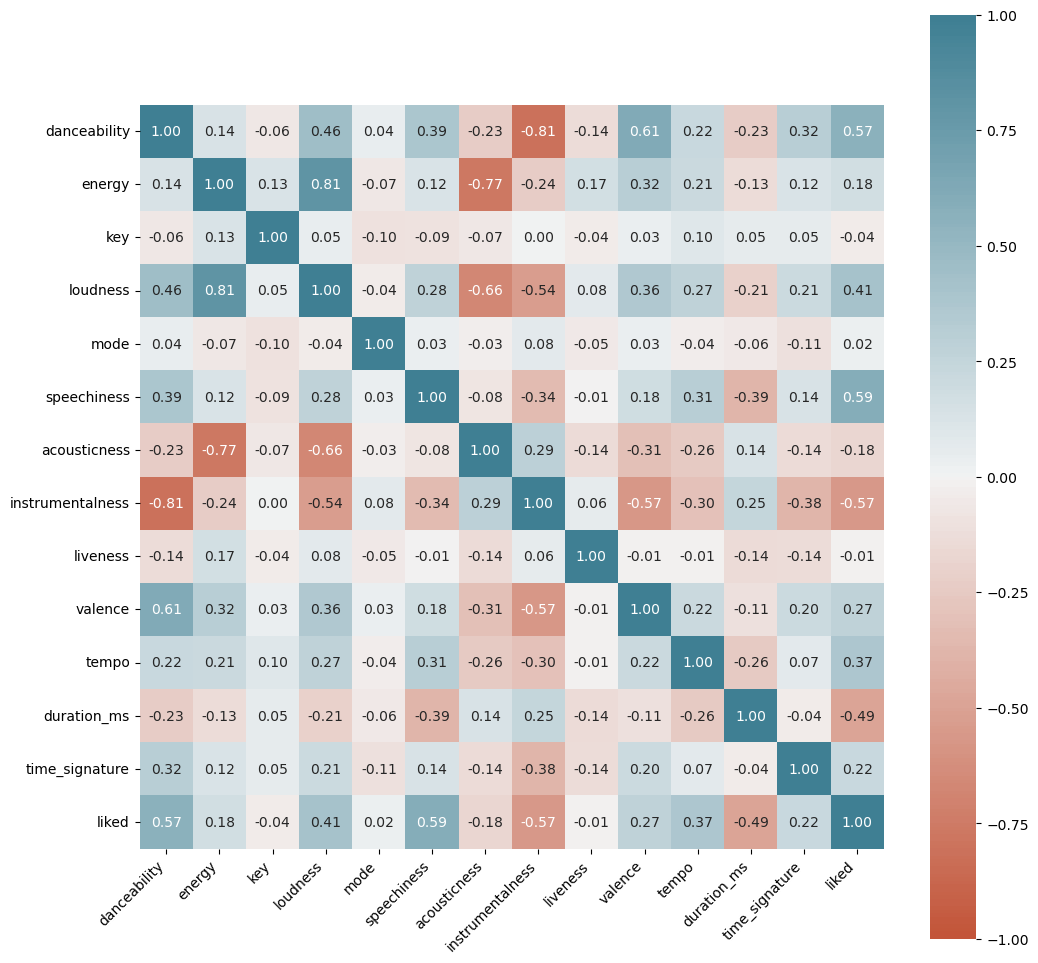

In [6]:
# correlaciones

# Vamos a estudiar las correlaciones para entender las variables
# Calcula coeficiente de correlación de Pearson
corr = train.corr(method ='pearson') #por defecto Pearson ¿existe relación lineal entre variables?

# HeatMap con tamaño ampliado, cuadrado, divergencia con colores y con anotaciones de 2 decimales
plt.figure(figsize=(12,12))
ax = sns.heatmap(
 corr,
 vmin=-1, vmax=1, center=0,
 cmap=sns.diverging_palette(20, 220, n=200),
 square=True, annot=True, fmt=".2f"
)
# Rota las etiquetas del eje horizontal
ax.set_xticklabels(
 ax.get_xticklabels(),
 rotation=45,
 horizontalalignment='right'
)


In [7]:
#  correlation con liked
corr = train.corr()
corr.sort_values(by=["liked"],ascending=False).iloc[0].sort_values(ascending=False)

liked               1.000000
speechiness         0.591505
danceability        0.569425
loudness            0.410774
tempo               0.371202
valence             0.268653
time_signature      0.221479
energy              0.176179
mode                0.023747
liveness           -0.009797
key                -0.044406
acousticness       -0.179375
duration_ms        -0.490651
instrumentalness   -0.569440
Name: liked, dtype: float64

Antes de empezar con el algoritmo de ML se procede a normalizar valores. Se pueden usar las funciones de sklearn.prepprocessing. Vamos a ver una comparativa al usar distintas funciones.

## Normalización

El primer método que vamos a utilizar para normalizar es uno de los más utilizado y se llama normalización **min-max**, El resultado de la normalización resta el valor mínimo de Dataframe y lo divide por la diferencia entre el valor más alto y el más bajo de la columna correspondiente.


In [8]:
# normalizamos valores para que no afecten las escalas
y = train["liked"].values
x_data = train.drop(["liked"],axis=1)

x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
x.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.824755,0.625604,0.636364,0.889092,0.0,0.038852,0.453265,0.000757,0.111519,0.627395,0.298644,0.393282,0.75
1,0.774510,0.705113,0.909091,0.859361,0.0,0.543147,0.207033,0.000000,0.096849,0.512014,0.760506,0.294069,0.75
2,0.160539,0.012581,0.090909,0.369017,1.0,0.027528,0.996985,0.925697,0.114852,0.003070,0.126184,0.362942,0.75
3,0.725490,0.738325,0.272727,0.883331,0.0,0.059938,0.433164,0.000001,0.149858,0.578702,0.247687,0.227880,0.75
4,0.805147,0.573269,0.090909,0.870257,1.0,0.379149,0.145726,0.000000,0.070345,0.647507,0.792108,0.176831,0.75


In [9]:
# misma transformación con MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame


scaler = MinMaxScaler(feature_range=(0, 1))

scaledData = scaler.fit_transform(x_data)


df_scaled= DataFrame(scaledData)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.824755,0.625604,0.636364,0.889092,0.0,0.038852,0.453265,0.000757,0.111519,0.627395,0.298644,0.393282,0.75
1,0.774510,0.705113,0.909091,0.859361,0.0,0.543147,0.207033,0.000000,0.096849,0.512014,0.760506,0.294069,0.75
2,0.160539,0.012581,0.090909,0.369017,1.0,0.027528,0.996985,0.925697,0.114852,0.003070,0.126184,0.362942,0.75
3,0.725490,0.738325,0.272727,0.883331,0.0,0.059938,0.433164,0.000001,0.149858,0.578702,0.247687,0.227880,0.75
4,0.805147,0.573269,0.090909,0.870257,1.0,0.379149,0.145726,0.000000,0.070345,0.647507,0.792108,0.176831,0.75


Otro método de normalización de datos es con la media. **La normalización media** es una de las formas más fáciles de normalizar los Dataframes de rangos variados. La normalización se hace restando la media y dividiendo por la desviación estándar para todos los elementos del Dataframe.

In [10]:
# x_data

df_mean_norm = x_data.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_mean_norm.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.767926,-0.055485,0.439963,0.416490,-1.077350,-0.840913,0.411205,-0.553405,-0.457236,0.501945,-0.894368,1.262814,0.19316
1,0.578650,0.248249,1.318386,0.234576,-1.077350,1.304192,-0.352555,-0.555525,-0.540275,0.094765,1.076839,0.468024,0.19316
2,-1.734221,-2.397315,-1.316884,-2.765691,0.923443,-0.889081,2.097710,2.035268,-0.438364,-1.701308,-1.630424,1.019759,0.19316
3,0.393989,0.375125,-0.731269,0.381241,-1.077350,-0.751222,0.348857,-0.555522,-0.240203,0.330108,-1.111852,-0.062215,0.19316
4,0.694062,-0.255412,-1.316884,0.301242,0.923443,0.606597,-0.542715,-0.555525,-0.690311,0.572921,1.211716,-0.471168,0.19316


In [11]:
# normalización media es lo implementado con StandardScaler
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x_data)

x_scaled = DataFrame(x_scaled)
x_scaled.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.769903,-0.055628,0.441095,0.417562,-1.080123,-0.843078,0.412263,-0.554830,-0.458413,0.503237,-0.896670,1.266065,0.193658
1,0.580139,0.248888,1.321780,0.235180,-1.080123,1.307549,-0.353462,-0.556955,-0.541666,0.095009,1.079610,0.469229,0.193658
2,-1.738685,-2.403485,-1.320274,-2.772810,0.925820,-0.891369,2.103110,2.040507,-0.439492,-1.705687,-1.634621,1.022384,0.193658
3,0.395003,0.376091,-0.733151,0.382222,-1.080123,-0.753156,0.349755,-0.556952,-0.240821,0.330957,-1.114714,-0.062375,0.193658
4,0.695849,-0.256069,-1.320274,0.302018,0.925820,0.608158,-0.544112,-0.556955,-0.692088,0.574396,1.214835,-0.472381,0.193658


In [53]:
# nos quedamos con la normalización StandarScaler, los datos de train están en 
x = DataFrame(x_scaled)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.769903,-0.055628,0.441095,0.417562,-1.080123,-0.843078,0.412263,-0.554830,-0.458413,0.503237,-0.896670,1.266065,0.193658
1,0.580139,0.248888,1.321780,0.235180,-1.080123,1.307549,-0.353462,-0.556955,-0.541666,0.095009,1.079610,0.469229,0.193658
2,-1.738685,-2.403485,-1.320274,-2.772810,0.925820,-0.891369,2.103110,2.040507,-0.439492,-1.705687,-1.634621,1.022384,0.193658
3,0.395003,0.376091,-0.733151,0.382222,-1.080123,-0.753156,0.349755,-0.556952,-0.240821,0.330957,-1.114714,-0.062375,0.193658
4,0.695849,-0.256069,-1.320274,0.302018,0.925820,0.608158,-0.544112,-0.556955,-0.692088,0.574396,1.214835,-0.472381,0.193658


## Aplicar el algoritmo de máquina de vectores de soporte y redes neuronales. 
Decidir los parámetros de cada uno y justificar su conveniencia.

Comenzamos separando datos de train+test

In [54]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)

In [32]:
x_train.shape

(156, 13)

In [33]:
x_test.shape

(39, 13)

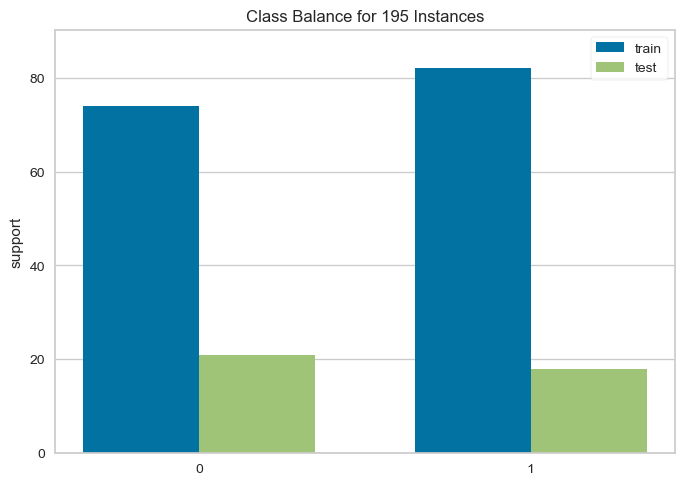

<AxesSubplot:title={'center':'Class Balance for 195 Instances'}, ylabel='support'>

In [34]:
# balanceo de clases en los conjuntos de test y train
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1])
visualizer.fit(y_train, y_test)
visualizer.poof()

In [19]:
y_test

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [35]:
# Probamos en un primer momento el clasificador SVC 
# C-Support Vector Classification 
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train,y_train)

# print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

test accuracy: 0.8974358974358975


In [36]:
from sklearn.metrics import classification_report,confusion_matrix

svm2_y_predict = svm.predict(x_test)

display(confusion_matrix(y_test,svm2_y_predict))
clas_report=classification_report(y_test,svm2_y_predict)
print(clas_report)

array([[18,  3],
       [ 1, 17]], dtype=int64)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.85      0.94      0.89        18

    accuracy                           0.90        39
   macro avg       0.90      0.90      0.90        39
weighted avg       0.90      0.90      0.90        39



In [37]:
# parámetros para los modelos
C = [1,0.1,0.25,0.5,2,0.75]
kernel = ["linear","rbf"]
gamma = ["auto",0.01,0.001,0.0001,1]

df_resultados = pd.DataFrame(columns=['C','kernel','gamma', 'train_accuracy', 'test_accuracy'])
for c in C:
    for k in kernel:
        for g in gamma:
            svm_model = SVC(C=c,decision_function_shape="ovo",gamma=g,kernel=k,random_state=1)
            clf = svm_model.fit(x_train,y_train)
            print('Hiperparámetros; ',c,k,g)
            tr_a = svm_model.score(x_train, y_train)
            #tst_a= svm_model.score(x_test, y_test)
            print("train_accuracy:",tr_a)
            print("test_accuracy: ", tst_a)
            list_ro = [c,k,g,tr_a,tst_a]
            df_resultados.loc[len(df_resultados)] = list_ro

Hiperparámetros;  1 linear auto
train_accuracy: 0.9166666666666666
test_accuracy:  0.8974358974358975
Hiperparámetros;  1 linear 0.01
train_accuracy: 0.9166666666666666
test_accuracy:  0.8974358974358975
Hiperparámetros;  1 linear 0.001
train_accuracy: 0.9166666666666666
test_accuracy:  0.8974358974358975
Hiperparámetros;  1 linear 0.0001
train_accuracy: 0.9166666666666666
test_accuracy:  0.8974358974358975
Hiperparámetros;  1 linear 1
train_accuracy: 0.9166666666666666
test_accuracy:  0.8974358974358975
Hiperparámetros;  1 rbf auto
train_accuracy: 0.8012820512820513
test_accuracy:  0.717948717948718
Hiperparámetros;  1 rbf 0.01
train_accuracy: 0.7115384615384616
test_accuracy:  0.6153846153846154
Hiperparámetros;  1 rbf 0.001
train_accuracy: 0.5256410256410257
test_accuracy:  0.46153846153846156
Hiperparámetros;  1 rbf 0.0001
train_accuracy: 0.5256410256410257
test_accuracy:  0.46153846153846156
Hiperparámetros;  1 rbf 1
train_accuracy: 0.9487179487179487
test_accuracy:  0.92307692307

In [38]:
df_resultados

,C,kernel,gamma,train_accuracy,test_accuracy
0,1.00,linear,auto,0.916667,0.897436
1,1.00,linear,0.01,0.916667,0.897436
2,1.00,linear,0.001,0.916667,0.897436
3,1.00,linear,0.0001,0.916667,0.897436
4,1.00,linear,1,0.916667,0.897436
5,1.00,rbf,auto,0.801282,0.717949
6,1.00,rbf,0.01,0.711538,0.615385
7,1.00,rbf,0.001,0.525641,0.461538
8,1.00,rbf,0.0001,0.525641,0.461538
9,1.00,rbf,1,0.948718,0.923077


In [45]:
# Construimos el modelo con los dos parámetros que hemos encontrado en la funcion anterior
svm_model = SVC(C=2,decision_function_shape="ovo",gamma=1,kernel="rbf",random_state=1)

In [39]:
svm_model = SVC(C=0.5,decision_function_shape="ovo",gamma='auto',kernel='linear',random_state=1)

In [46]:
clf = svm_model.fit(x_train,y_train)

In [47]:
print("train_accuracy:",svm_model.score(x_train, y_train))
print("test_accuracy: ", svm_model.score(x_test, y_test))

train_accuracy: 0.967948717948718
test_accuracy:  0.9230769230769231


In [48]:
from sklearn.metrics import classification_report,confusion_matrix

svm2_y_predict = clf.predict(x_test)

display(confusion_matrix(y_test,svm2_y_predict))
clas_report=classification_report(y_test,svm2_y_predict)
print(clas_report)

array([[19,  2],
       [ 1, 17]], dtype=int64)

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.89      0.94      0.92        18

    accuracy                           0.92        39
   macro avg       0.92      0.92      0.92        39
weighted avg       0.92      0.92      0.92        39



## Selección de los mejores parámetro para el modelo con GridSearch

In [43]:
# Seleccionamos los parámetros de SVM usando GridSearchCV
from sklearn.model_selection import GridSearchCV

C = [1,0.1,0.25,0.5,2,0.75]
kernel = ["linear","rbf"]
gamma = ["auto",0.01,0.001,0.0001,1]
decision_function_shape = ["ovo","ovr"]

In [44]:
svm = SVC(random_state=1)
grid_svm = GridSearchCV(estimator=svm,cv=10,param_grid=dict(kernel=kernel,C=C, gamma=gamma, decision_function_shape=decision_function_shape))
grid_svm.fit(x_train,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.9045833333333334
best param:  {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'rbf'}


# Redes neuronales

In [50]:
#Importamos el algoritmo de una red neuronal clasificadora con multilayer:

from sklearn.neural_network import MLPClassifier

In [59]:
#Implementamos la red neuronal 

#Se prueba primero con una red neuronal de 100 neuronas en la capa oculta.

neural_classifier1 = MLPClassifier(activation = 'relu', hidden_layer_sizes=(100,40), solver='adam', alpha = 0.0001,
                                   learning_rate = 'constant', learning_rate_init = 0.001,
                                   verbose = True, early_stopping = False, beta_1 = 0.9,
                                   beta_2 = 0.999, epsilon = 1e-8,random_state=1, max_iter=800).fit(x_train, y_train)

neural1_y_predict = neural_classifier1.predict(x_test)

Iteration 1, loss = 0.76358422
Iteration 2, loss = 0.73024538
Iteration 3, loss = 0.69890752
Iteration 4, loss = 0.66966485
Iteration 5, loss = 0.64240678
Iteration 6, loss = 0.61685244
Iteration 7, loss = 0.59316116
Iteration 8, loss = 0.57094757
Iteration 9, loss = 0.55025416
Iteration 10, loss = 0.53077030
Iteration 11, loss = 0.51245454
Iteration 12, loss = 0.49524466
Iteration 13, loss = 0.47896882
Iteration 14, loss = 0.46352404
Iteration 15, loss = 0.44881618
Iteration 16, loss = 0.43464833
Iteration 17, loss = 0.42099104
Iteration 18, loss = 0.40781425
Iteration 19, loss = 0.39506746
Iteration 20, loss = 0.38269524
Iteration 21, loss = 0.37071162
Iteration 22, loss = 0.35910969
Iteration 23, loss = 0.34787350
Iteration 24, loss = 0.33690689
Iteration 25, loss = 0.32632000
Iteration 26, loss = 0.31618215
Iteration 27, loss = 0.30643066
Iteration 28, loss = 0.29710916
Iteration 29, loss = 0.28817780
Iteration 30, loss = 0.27961922
Iteration 31, loss = 0.27143212
Iteration 32, los

Comparar, mediante las medidas que le parezcan adecuadas, la capacidad predictiva de ambos métodos. 

In [60]:
display(confusion_matrix(y_test,neural1_y_predict))
clas_report=classification_report(y_test,neural1_y_predict)
print(clas_report)

array([[18,  3],
       [ 2, 16]], dtype=int64)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        21
           1       0.84      0.89      0.86        18

    accuracy                           0.87        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.87      0.87      0.87        39



In [61]:
from sklearn import svm

#Cargamos también las librerías para hacer la matriz de confusión y la cross validation:

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

# Precisión y matriz de confusión sobre el modelo, utilizando sólo 1 de los folds:
print("Precisión:",metrics.accuracy_score(y_test, neural1_y_predict))

#Confusion Matrix:
pd.crosstab(y_test, neural1_y_predict, rownames=["Real"], colnames=["Predicho"])

Precisión: 0.8717948717948718


Predicho,0,1
Real,,
0,18,3
1,2,16


In [ ]:
kf = KFold(n_splits=5)

#Quitamos el Verbose para evitar que nos haga para todos los folds la evolución de cada red Neuronal y tener
#el notebook más limpio:
neural_classifier1.verbose=False

#Hacemos la 5-Fold Validation
scores_neural_1 = cross_val_score(neural_classifier1, x_train, y_train, cv=kf)

In [ ]:
print(scores_neural_1)
print(scores_neural_1.mean())

In [ ]:
neural_classifier1 = MLPClassifier(activation = 'relu', hidden_layer_sizes=(200), solver='adam', alpha = 0.0001,
                                   learning_rate = 'constant', learning_rate_init = 0.001,
                                   verbose = True, early_stopping = False, beta_1 = 0.9,
                                   beta_2 = 0.999, epsilon = 1e-8,random_state=1, max_iter=800).fit(x_train, y_train)

neural1_y_predict = neural_classifier1.predict(x_test)

In [ ]:
# Precisión y matriz de confusión sobre el modelo, utilizando sólo 1 de los folds:
print("Precisión:",metrics.accuracy_score(y_test, neural1_y_predict))

#Confusion Matrix:
pd.crosstab(y_test, neural1_y_predict, rownames=["Real"], colnames=["Predicho"])